In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Input
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib_inline

np.set_printoptions(suppress=True)

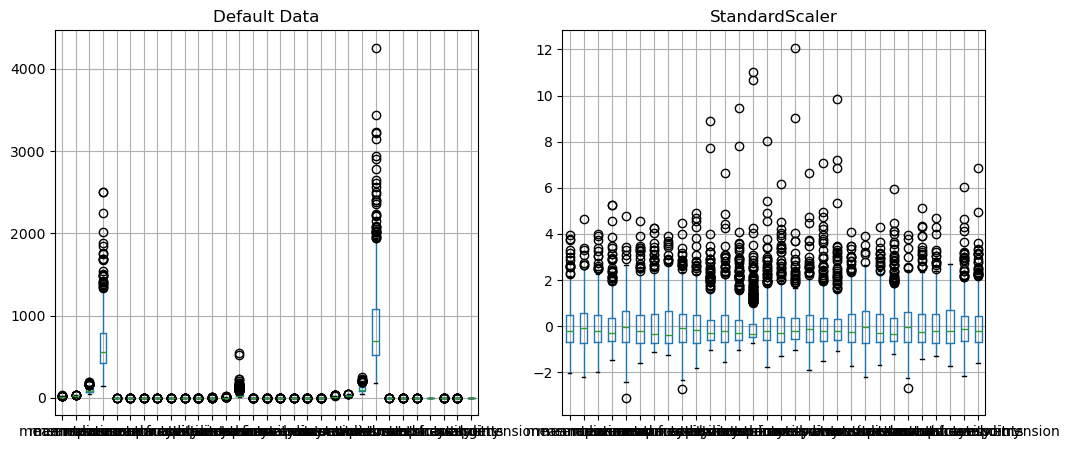

In [2]:
# Load & Clean data
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data , columns=cancer.feature_names)
df['target'] = cancer.target

X = StandardScaler().fit_transform(df.drop(columns=['target']))
y = df['target']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25)


new_df = pd.DataFrame(X , columns=cancer.feature_names)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Default Data')
df.boxplot()
plt.subplot(1,2,2)
plt.title('StandardScaler')
new_df.boxplot()
plt.show()

In [3]:
model = Sequential()
model.add(Input(shape=(30,)))
model.add(Dense(32 , activation='relu'))
model.add(Dense(1  , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

callback = EarlyStopping(monitor='loss',patience=3)
history = model.fit(X_train , y_train ,
         epochs=100,
         batch_size=32,
         verbose=0,
         validation_split=.25,
         callbacks=[callback])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,077 (12.02 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,052 (8.02 KB)

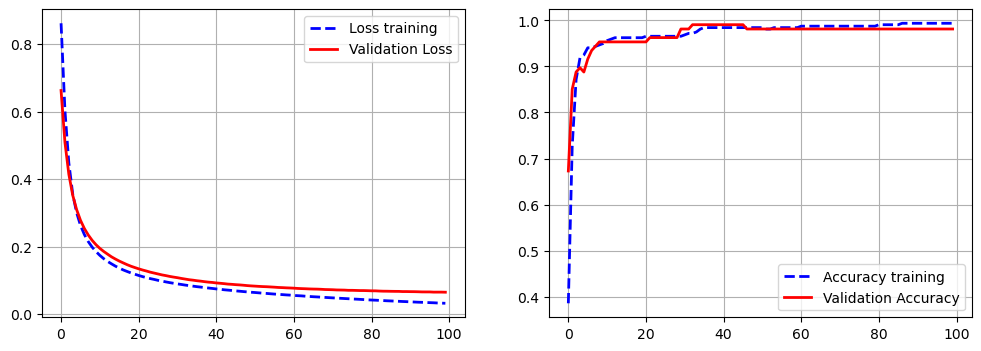

In [4]:

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'] , '--' , c='b' , lw=2 , label='Loss training')
plt.plot(history.history['val_loss'] , '-' , c='r' , lw=2 , label='Validation Loss')
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'] , '--' , c='b' , lw=2 , label='Accuracy training')
plt.plot(history.history['val_accuracy'] , '-' , c='r' , lw=2 , label='Validation Accuracy')
plt.grid()
plt.legend()
plt.show()

In [5]:
loss , accuracy = model.evaluate(X_test , y_test)
print('Loss:',loss)
print('Accuracy:',accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.9830 - loss: 0.0652
Loss: 0.07060529291629791
Accuracy: 0.9790209531784058


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


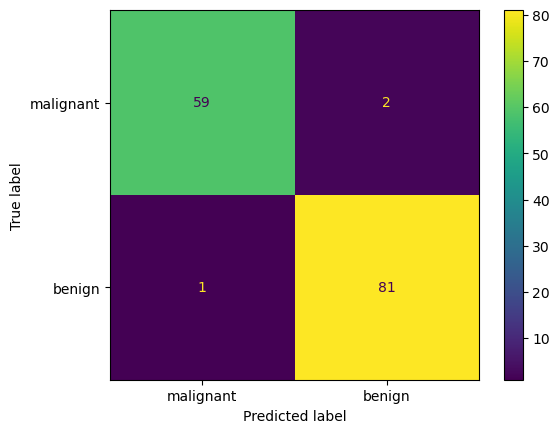

In [6]:
y_pred = np.where(model.predict(X_test) > 0.5 , 1,0)
cm = confusion_matrix(y_test , y_pred)
ConfusionMatrixDisplay(cm , display_labels = cancer.target_names).plot()
plt.show()


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 191us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.9510 - loss: 0.1232
Accuracy Test with reduce dimension: [0.13597269356250763, 0.9440559148788452]


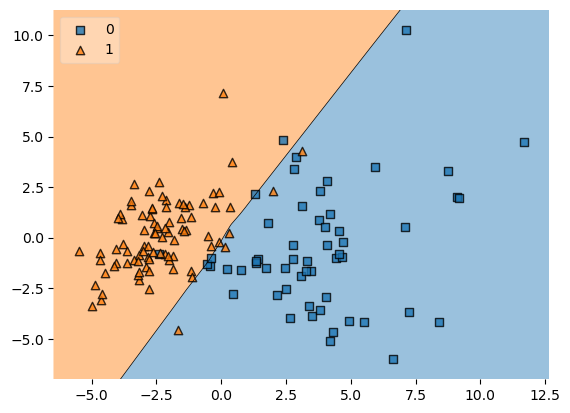

In [13]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
X_train_pca , X_test_pca , y_train_pca, y_test_pca = train_test_split(x_pca , y , test_size=0.25 )

model_pca = Sequential()
model_pca.add(Input(shape=(2,)))
model_pca.add(Dense(32 , activation='relu'))
model_pca.add(Dense(1  , activation='sigmoid'))

model_pca.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

callback = EarlyStopping(monitor='loss',patience=3)
model_pca.fit(X_train_pca , y_train_pca , batch_size=32 , epochs=500 , verbose=0)
plot_decision_regions(X_test_pca , y_test_pca.to_numpy() , clf=model_pca , legend=2)

score = model_pca.evaluate(X_test_pca , y_test_pca)
print('Accuracy Test with reduce dimension:',score)